In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [3]:
def unwrap(lst):
    ret = []
    for inLst in lst:
        ret.append(inLst[0])
    return ret

def fromSeriesToDF(df,series,IDX):
    series = df.iloc[IDX,:]
    dfSeries = series.to_frame()
    newdata = { 'ds':dfSeries.axes[0][1:].tolist(),'y':unwrap(dfSeries.values.tolist()[1:]) }
    newframe = pd.DataFrame(data=newdata)
    return newframe

def getTrainTest(df,sz,prc):
    proc = 100 - prc
    until = (proc * sz) // 100
    return df.iloc[:until],df.iloc[until:],until

def smape(actual,forecasted):
    if len(actual) != len(forecasted):
        raise Exception("Lists not equal")
    lst_size = len(actual)
    sum = 0
    for i in range(0,lst_size):
        sum += (np.absolute(forecasted[i] - actual[i]))/(np.absolute(forecasted[i]) + np.absolute(actual[i]))
    return sum / lst_size

In [4]:
def doForSeries(df,series,IDX):
    newdf = fromSeriesToDF(df,series,IDX)
    df_size = newdf.shape[0]
    train_df,test_df,until = getTrainTest(newdf,df_size,30)

    my_model = Prophet(interval_width=0.95)
    my_model.fit(train_df)
    future_dates = my_model.make_future_dataframe(periods=df_size-until)
    forecast = my_model.predict(future_dates)
    
    forecasted_values = unwrap(forecast[['yhat']].values.tolist()[until:])
    test_values = unwrap(test_df[['y']].values.tolist())
    return smape(test_values,forecasted_values)
    
def overlord(df,GO_UNTIL):
    ret = []
    for i in range(0,GO_UNTIL):
        ret.append(doForSeries(df,df.iloc[i],i))
    return ret
        

In [5]:
GO_UNTIL = 5
df = pd.read_csv('train_1.csv')
lst = overlord(df,GO_UNTIL)
lst

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonal

[0.31013612472427515,
 0.23056686039413085,
 0.29024416575712075,
 0.36878532802459613,
 0.98906044459256892]

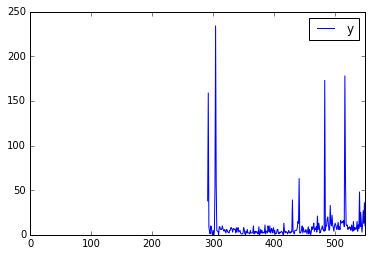

In [6]:
row = fromSeriesToDF(df,df.iloc[4],4)
row.plot()
plt.show()